# Aula 07 - EDA Parte 1: Estatísticas e Visualizações Básicas
**Curso:** Programação para Ciência de Dados  
**Aluno:** Gisele Fonseca
**Data:** 28 de outubro

## Instruções
1. Complete todos os exercícios marcados com `# === SEU CÓDIGO AQUI ===`
2. Execute as células de teste para verificar suas respostas
3. **Tempo estimado total:** 30 minutos

## Critérios de Avaliação
- **Conteúdo (100%):** Testes automáticos

## Objetivo
Consolidar conhecimentos de EDA através de análises estatísticas e visualizações.

In [1]:
# === CONFIGURAÇÃO INICIAL ===

!pip install --upgrade pip --quiet
!pip cache purge
!pip install otter-grader --no-cache-dir -q
!mkdir -p tests

print("Ambiente configurado!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.8 MB/s eta 0:00:00
Files removed: 6 (1.8 MB)
Ambiente configurado!


In [2]:
%%writefile tests/q1.py
OK_FORMAT = True

test = {
    "name": "q1",
    "points": 3,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Retorna DataFrame
>>> import pandas as pd
>>> df = pd.DataFrame({'cat': ['A', 'B'], 'val': [10, 20]})
>>> resultado = analise_completa_por_grupo(df)
>>> isinstance(resultado, pd.DataFrame)
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 2: Colunas corretas
>>> import pandas as pd
>>> df = pd.DataFrame({'cat': ['A', 'B'], 'val': [10, 20]})
>>> resultado = analise_completa_por_grupo(df)
>>> 'media' in resultado.columns and 'cv' in resultado.columns
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q1.py


In [3]:
%%writefile tests/q2.py
OK_FORMAT = True

test = {
    "name": "q2",
    "points": 3,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Retorna dicionário
>>> import pandas as pd
>>> df = pd.DataFrame({'val': [10, 20, 30]})
>>> resultado = detectar_e_tratar_outliers(df)
>>> isinstance(resultado, dict)
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 2: Chaves corretas
>>> import pandas as pd
>>> df = pd.DataFrame({'val': [10, 20, 30]})
>>> resultado = detectar_e_tratar_outliers(df)
>>> 'df_limpo' in resultado and 'outliers' in resultado
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q2.py


In [4]:
%%writefile tests/q3.py
OK_FORMAT = True

test = {
    "name": "q3",
    "points": 2,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Cria subplot
>>> import pandas as pd
>>> import matplotlib.pyplot as plt
>>> df = pd.DataFrame({'val': [10, 20, 30]})
>>> fig, axes = criar_dashboard_basico(df)
>>> isinstance(fig, plt.Figure)
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q3.py


In [5]:
%%writefile tests/q4.py
OK_FORMAT = True

test = {
    "name": "q4",
    "points": 2,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Retorna string
>>> import pandas as pd
>>> df = pd.DataFrame({'val': [10, 20, 30, 40, 50]})
>>> resultado = comparar_tendencias_centrais(df)
>>> isinstance(resultado, str)
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q4.py


In [6]:
import otter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

grader = otter.Notebook()

print("✓ Otter Grader carregado")
print("✓ Bibliotecas importadas")
print(f"✓ Versão Pandas: {pd.__version__}")

✓ Otter Grader carregado
✓ Bibliotecas importadas
✓ Versão Pandas: 2.2.2


# Exercício 1: Análise Estatística Completa por Grupo

## Descrição
Dado DataFrame com 'cat' (categoria) e 'val' (valor),
crie análise estatística completa por categoria incluindo:

1. media: média dos valores
2. mediana: mediana dos valores
3. desvio_padrao: desvio padrão
4. cv: coeficiente de variação (desvio_padrao / media × 100)
5. iqr: amplitude interquartil (Q3 - Q1)
6. num_outliers: quantidade de outliers

## Exemplo
```python
df = pd.DataFrame({
    'cat': ['A', 'A', 'A', 'B', 'B', 'B'],
    'val': [10, 12, 11, 100, 110, 105]
})

analise_completa_por_grupo(df)
#     media  mediana  desvio_padrao    cv   iqr  num_outliers
# A    11.0     11.0           1.0   9.1   1.0             0
# B   105.0    105.0           5.0   4.8   5.0             0
```

## Dicas
- Use groupby().agg() com funções customizadas
- CV = (std / mean) × 100
- IQR = Q3 - Q1
- Outliers: valores fora de [Q1 - 1.5×IQR, Q3 + 1.5×IQR]

**Tempo estimado:** 12 minutos

In [8]:
def analise_completa_por_grupo(df):
    """
    Análise estatística completa por categoria.

    Args:
        df (pd.DataFrame): DataFrame com 'cat' e 'val'

    Returns:
        pd.DataFrame: Análise estatística por grupo
    """
    # === SEU CÓDIGO AQUI ===
    resultado = []

    for categoria, grupo in df.groupby('cat'):
        media = grupo['val'].mean()
        mediana = grupo['val'].median()
        desvio_padrao = grupo['val'].std()
        cv = (desvio_padrao / media) * 100 if media != 0 else np.nan
        q1 = grupo['val'].quantile(0.25)
        q3 = grupo['val'].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr
        num_outliers = grupo[(grupo['val'] < limite_inferior) | (grupo['val'] > limite_superior)].shape[0]

        resultado.append({
            'cat': categoria,
            'media': media,
            'mediana': mediana,
            'desvio_padrao': desvio_padrao,
            'cv': cv,
            'iqr': iqr,
            'num_outliers': num_outliers
        })

    return pd.DataFrame(resultado).set_index('cat')

    # === FIM DO SEU CÓDIGO ===

In [9]:
# Criar dados de vendas por região
np.random.seed(42)
df_vendas_regiao = pd.DataFrame({
    'cat': ['Norte']*30 + ['Sul']*30 + ['Sudeste']*30,
    'val': np.concatenate([
        np.random.normal(50000, 5000, 30),   # Norte
        np.random.normal(75000, 8000, 30),   # Sul
        np.random.normal(100000, 12000, 30)  # Sudeste
    ])
})

# Adicionar alguns outliers
df_vendas_regiao.loc[5, 'val'] = 20000  # Outlier baixo no Norte
df_vendas_regiao.loc[65, 'val'] = 150000  # Outlier alto no Sudeste

print("=== TESTE Q1 ===")
print("\n=== AMOSTRA DOS DADOS ===")
print(df_vendas_regiao.head(10))

# Análise completa
analise = analise_completa_por_grupo(df_vendas_regiao)

print("\n=== ANÁLISE ESTATÍSTICA POR REGIÃO ===")
print(analise.round(2))

print("\n=== INTERPRETAÇÃO ===")
print(f"\nRegião com maior média: {analise['media'].idxmax()}")
print(f"Valor médio: R$ {analise['media'].max():,.2f}")

print(f"\nRegião mais variável (maior CV): {analise['cv'].idxmax()}")
print(f"CV: {analise['cv'].max():.1f}%")

print(f"\nTotal de outliers detectados: {analise['num_outliers'].sum():.0f}")

print("\n💡 CV (Coeficiente de Variação):")
print("   < 15%: baixa variabilidade")
print("   15-30%: variabilidade moderada")
print("   > 30%: alta variabilidade")

grader.check("q1")

=== TESTE Q1 ===

=== AMOSTRA DOS DADOS ===
     cat           val
0  Norte  52483.570765
1  Norte  49308.678494
2  Norte  53238.442691
3  Norte  57615.149282
4  Norte  48829.233126
5  Norte  20000.000000
6  Norte  57896.064078
7  Norte  53837.173646
8  Norte  47652.628070
9  Norte  52712.800218

=== ANÁLISE ESTATÍSTICA POR REGIÃO ===
             media    mediana  desvio_padrao     cv       iqr  num_outliers
cat                                                                        
Norte     48098.29   48685.38        6957.86  14.47   5957.57             1
Sudeste  101278.79  100307.33       14734.54  14.55  15022.24             2
Sul       74030.70   74483.42        7448.82  10.06  10030.20             0

=== INTERPRETAÇÃO ===

Região com maior média: Sudeste
Valor médio: R$ 101,278.79

Região mais variável (maior CV): Sudeste
CV: 14.5%

Total de outliers detectados: 3

💡 CV (Coeficiente de Variação):
   < 15%: baixa variabilidade
   15-30%: variabilidade moderada
   > 30%: alta var

q1 results: All test cases passed!

# Exercício 2: Detecção e Tratamento de Outliers

## Descrição
Dado DataFrame com coluna 'val', implemente:

1. Detecte outliers usando regra IQR
2. Retorne dicionário com:
   - 'df_limpo': DataFrame sem outliers
   - 'outliers': Series com valores outliers
   - 'indices_outliers': lista de índices dos outliers
   - 'percentual_outliers': % de outliers
   - 'limites': tupla (limite_inferior, limite_superior)

## Exemplo
```python
df = pd.DataFrame({'val': [10, 12, 11, 13, 100, 12, 11]})

resultado = detectar_e_tratar_outliers(df)
# resultado['df_limpo'] → DataFrame sem o valor 100
# resultado['outliers'] → Series([100])
# resultado['percentual_outliers'] → 14.3
# resultado['limites'] → (10,100)
```

## Dicas
- Outlier se: val < Q1 - 1.5×IQR ou val > Q3 + 1.5×IQR
- Use .drop() para remover outliers
- Percentual = (num_outliers / total) × 100

**Tempo estimado:** 10 minutos

In [10]:
def detectar_e_tratar_outliers(df):
    """
    Detecta e remove outliers usando regra IQR.

    Args:
        df (pd.DataFrame): DataFrame com coluna 'val'

    Returns:
        dict: Dicionário com resultados
    """
    # === SEU CÓDIGO AQUI ===
    q1 = df['val'].quantile(0.25)
    q3 = df['val'].quantile(0.75)
    iqr = q3 - q1

    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    cond_outliers = (df['val'] < limite_inferior) | (df['val'] > limite_superior)
    outliers = df.loc[cond_outliers, 'val']
    df_limpo = df.loc[~cond_outliers].reset_index(drop=True)

    resultado = {
        'df_limpo': df_limpo,
        'outliers': outliers,
        'indices_outliers': list(outliers.index),
        'percentual_outliers': (len(outliers) / len(df)) * 100,
        'limites': (limite_inferior, limite_superior)
    }

    return resultado

    # === FIM DO SEU CÓDIGO ===

In [11]:
# Criar dados com outliers
np.random.seed(42)
valores_normais = np.random.normal(100, 10, 100)
valores_outliers = [30, 40, 180, 190, 200]  # Outliers óbvios

df_com_outliers = pd.DataFrame({
    'val': np.concatenate([valores_normais, valores_outliers])
})

print("=== TESTE Q2 ===")
print("\n=== DADOS ORIGINAIS ===")
print(f"Total de observações: {len(df_com_outliers)}")
print(f"\nEstatísticas:")
print(df_com_outliers['val'].describe())

# Detectar e tratar outliers
resultado = detectar_e_tratar_outliers(df_com_outliers)

print("\n=== RESULTADOS DA DETECÇÃO ===")
print(f"Outliers encontrados: {len(resultado['outliers'])}")
print(f"Percentual de outliers: {resultado['percentual_outliers']:.1f}%")

print(f"\n=== LIMITES IQR ===")
print(f"Limite inferior: {resultado['limites'][0]:.2f}")
print(f"Limite superior: {resultado['limites'][1]:.2f}")

print(f"\n=== VALORES OUTLIERS ===")
print(sorted(resultado['outliers'].values))

print(f"\n=== DADOS LIMPOS ===")
print(f"Total de observações: {len(resultado['df_limpo'])}")
print(f"\nEstatísticas após remoção:")
print(resultado['df_limpo']['val'].describe())

print("\n=== COMPARAÇÃO ===")
print(f"Média original: {df_com_outliers['val'].mean():.2f}")
print(f"Média limpa: {resultado['df_limpo']['val'].mean():.2f}")
print(f"Diferença: {abs(df_com_outliers['val'].mean() - resultado['df_limpo']['val'].mean()):.2f}")

grader.check("q2")

=== TESTE Q2 ===

=== DADOS ORIGINAIS ===
Total de observações: 105

Estatísticas:
count    105.000000
mean     100.344319
std       19.918250
min       30.000000
25%       93.982934
50%       98.843517
75%      105.132674
max      200.000000
Name: val, dtype: float64

=== RESULTADOS DA DETECÇÃO ===
Outliers encontrados: 6
Percentual de outliers: 5.7%

=== LIMITES IQR ===
Limite inferior: 77.26
Limite superior: 121.86

=== VALORES OUTLIERS ===
[np.float64(30.0), np.float64(40.0), np.float64(73.80254895910255), np.float64(180.0), np.float64(190.0), np.float64(200.0)]

=== DADOS LIMPOS ===
Total de observações: 99

Estatísticas após remoção:
count     99.000000
mean      99.215666
std        8.763243
min       80.124311
25%       94.185369
50%       98.843517
75%      104.362061
max      118.522782
Name: val, dtype: float64

=== COMPARAÇÃO ===
Média original: 100.34
Média limpa: 99.22
Diferença: 1.13


q2 results: All test cases passed!

# Exercício 3: Dashboard de Visualizações

## Descrição
Dado DataFrame com coluna 'val', crie dashboard 2×2 com:

1. **Top-left:** Histograma com 30 bins
2. **Top-right:** Boxplot
3. **Bottom-left:** Texto com estatísticas (média, mediana, std)
4. **Bottom-right:** QQ-plot ou texto com interpretação

## Retorno Esperado
Tupla (fig, axes) com os 4 subplots.

## Dicas
```python
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0, 0]  # Top-left
axes[0, 1]  # Top-right
axes[1, 0]  # Bottom-left
axes[1, 1]  # Bottom-right

# Adicionar texto
axes[i, j].text(0.5, 0.5, 'texto', ha='center', va='center')
axes[i, j].axis('off')  # Remover eixos
```

**Tempo estimado:** 8 minutos

In [12]:
def criar_dashboard_basico(df):
    """
    Cria dashboard 2×2 com visualizações.

    Args:
        df (pd.DataFrame): DataFrame com coluna 'val'

    Returns:
        tuple: (fig, axes)
    """
    # === SEU CÓDIGO AQUI ===
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Top-left: Histograma
    axes[0, 0].hist(df['val'], bins=30, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Histograma de Valores')
    axes[0, 0].set_xlabel('Valor')
    axes[0, 0].set_ylabel('Frequência')

    # Top-right: Boxplot
    axes[0, 1].boxplot(df['val'], vert=True, patch_artist=True)
    axes[0, 1].set_title('Boxplot dos Valores')

    # Bottom-left: Estatísticas
    media = df['val'].mean()
    mediana = df['val'].median()
    std = df['val'].std()
    texto = f"Média: {media:.2f}\nMediana: {mediana:.2f}\nDesvio Padrão: {std:.2f}"
    axes[1, 0].text(0.5, 0.5, texto, ha='center', va='center', fontsize=12)
    axes[1, 0].axis('off')

    # Bottom-right: Interpretação
    axes[1, 1].text(
        0.5, 0.5,
        "Verifique se a distribuição é simétrica e\nse há outliers significativos no boxplot.",
        ha='center', va='center', fontsize=12
    )
    axes[1, 1].axis('off')

    plt.tight_layout()
    return fig, axes

    # === FIM DO SEU CÓDIGO ===

=== TESTE Q3 ===

=== CRIANDO DASHBOARD ===


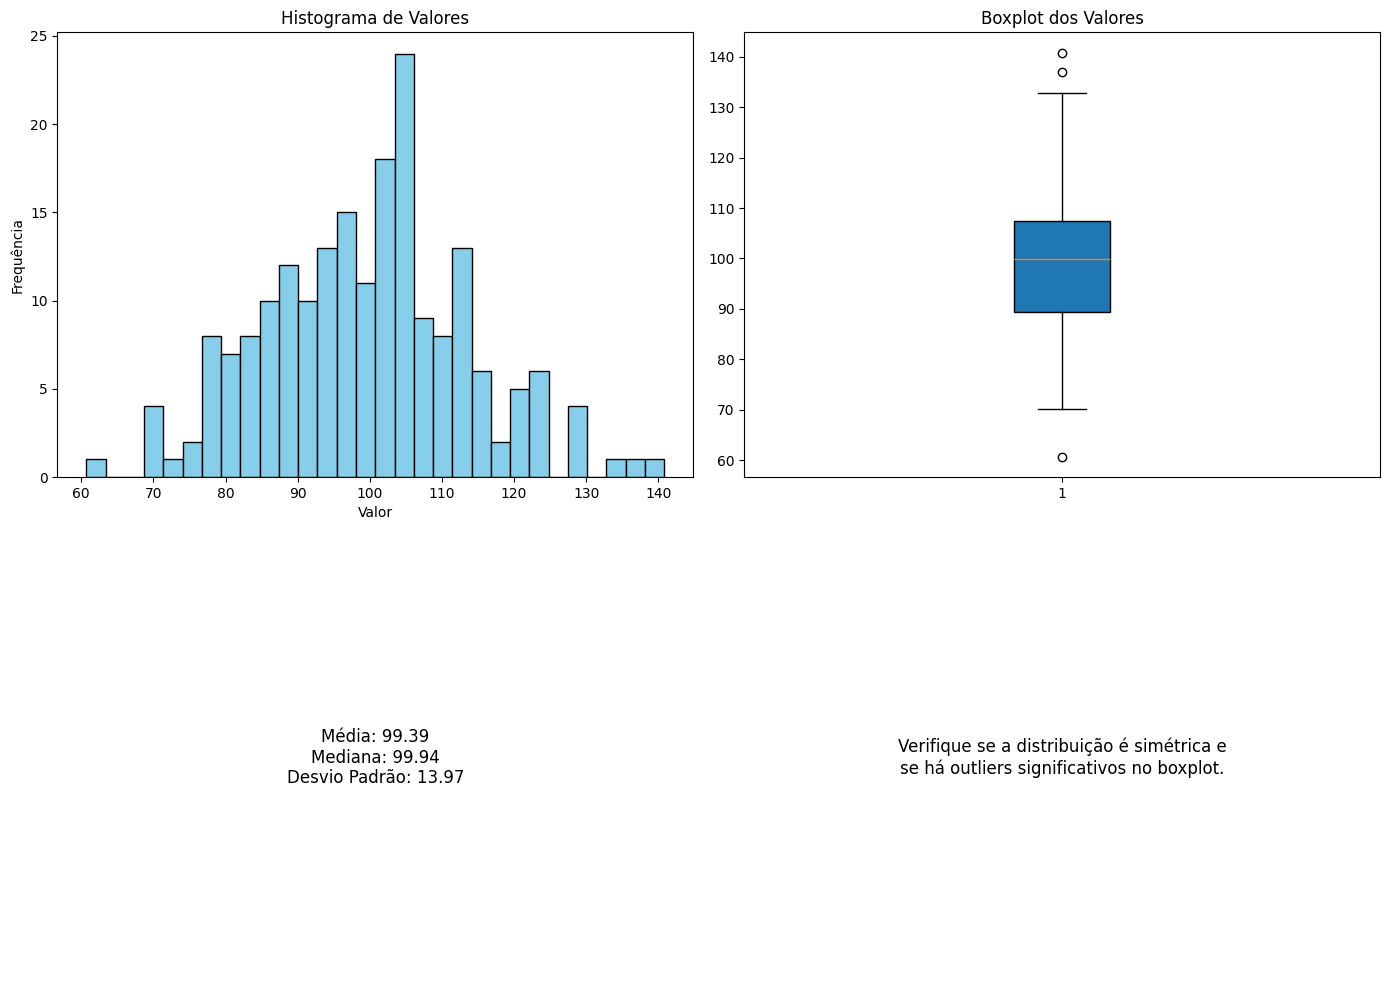


✓ Dashboard criado com sucesso!

💡 O dashboard mostra:
   1. Histograma: forma da distribuição
   2. Boxplot: quartis e outliers
   3. Estatísticas: resumo numérico
   4. Interpretação: insights principais


q3 results: All test cases passed!

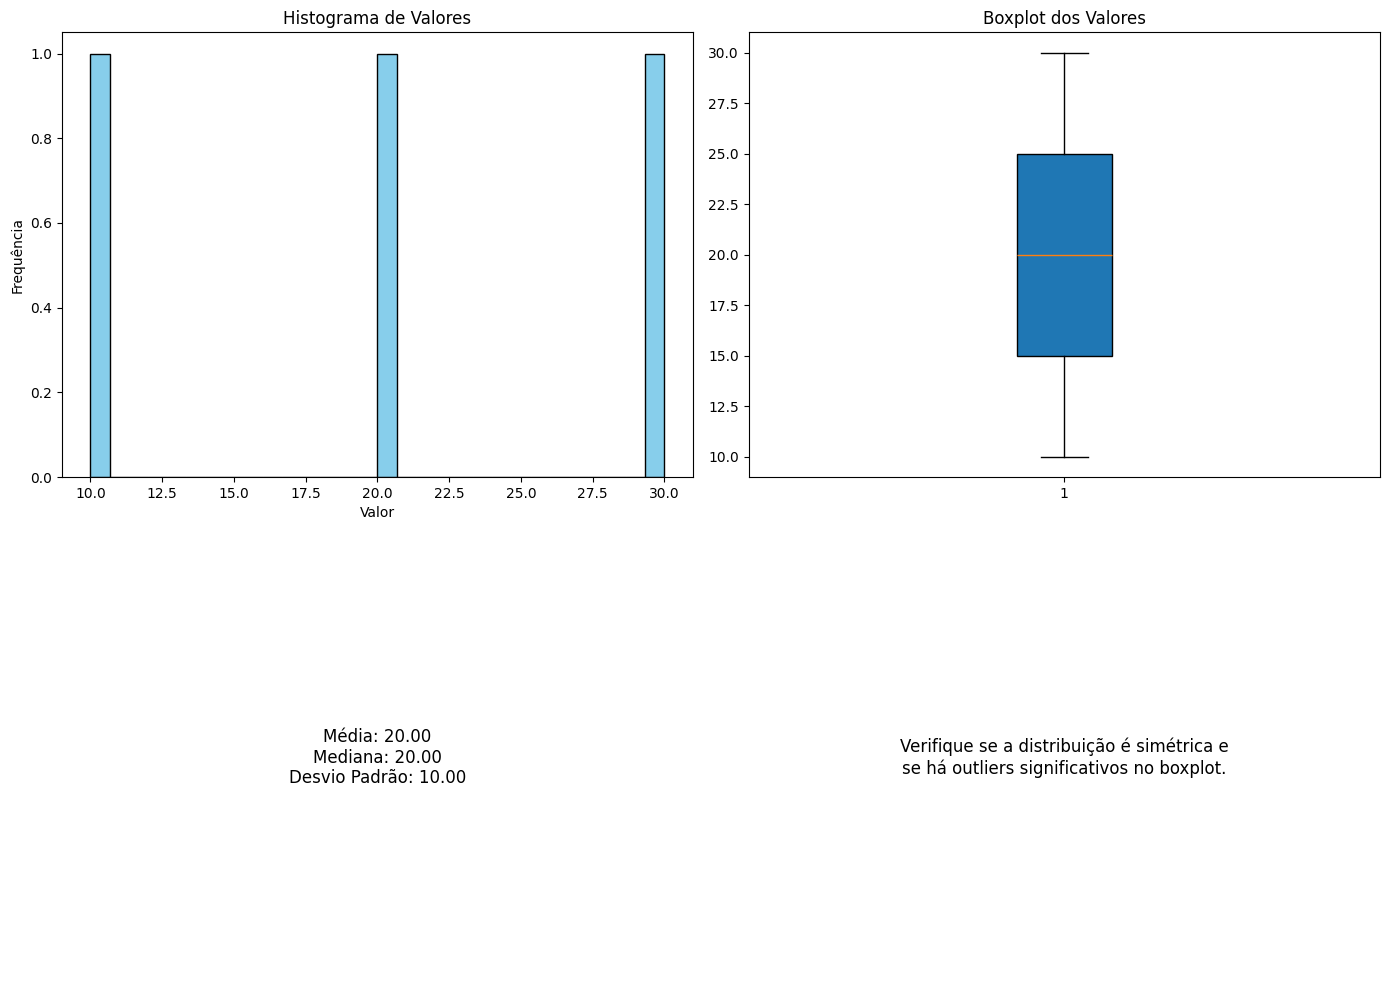

In [13]:
# Criar dados para visualização
np.random.seed(42)
df_viz = pd.DataFrame({
    'val': np.random.normal(100, 15, 200)
})

print("=== TESTE Q3 ===")
print("\n=== CRIANDO DASHBOARD ===")

# Criar dashboard
fig, axes = criar_dashboard_basico(df_viz)
plt.show()

print("\n✓ Dashboard criado com sucesso!")
print("\n💡 O dashboard mostra:")
print("   1. Histograma: forma da distribuição")
print("   2. Boxplot: quartis e outliers")
print("   3. Estatísticas: resumo numérico")
print("   4. Interpretação: insights principais")

grader.check("q3")

# Exercício 4: Análise Comparativa de Tendências

## Descrição
Dado DataFrame com coluna 'val', determine qual medida de
tendência central é mais apropriada e explique por quê.

Retorne string com uma das opções:
- 'media' - se distribuição é simétrica e sem outliers
- 'mediana' - se há outliers ou assimetria

Critérios:
- Se |média - mediana| < 0.1 × desvio_padrão → simétrica → 'media'
- Se há outliers (usando IQR) → 'mediana'
- Caso contrário → 'mediana' (mais robusta)

## Exemplo
```python
df = pd.DataFrame({'val': [10, 11, 12, 13, 100]})  # Outlier 100
comparar_tendencias_centrais(df)
# 'mediana'
```

**Tempo estimado:** 5 minutos

In [14]:
def comparar_tendencias_centrais(df):
    """
    Determina qual medida de tendência central é mais apropriada.

    Args:
        df (pd.DataFrame): DataFrame com coluna 'val'

    Returns:
        str: 'media' ou 'mediana'
    """
    # === SEU CÓDIGO AQUI ===
    media = df['val'].mean()
    mediana = df['val'].median()
    std = df['val'].std()

    q1 = df['val'].quantile(0.25)
    q3 = df['val'].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    outliers = df[(df['val'] < limite_inferior) | (df['val'] > limite_superior)]

    if len(outliers) > 0:
        return 'mediana'
    elif abs(media - mediana) < 0.1 * std:
        return 'media'
    else:
        return 'mediana'

    # === FIM DO SEU CÓDIGO ===

In [15]:
print("=== TESTE Q4 ===")

# Teste 1: Dados simétricos sem outliers
np.random.seed(42)
df_simetrico = pd.DataFrame({'val': np.random.normal(100, 10, 100)})

resultado1 = comparar_tendencias_centrais(df_simetrico)
print("\n=== TESTE 1: Distribuição Simétrica ===")
print(f"Média: {df_simetrico['val'].mean():.2f}")
print(f"Mediana: {df_simetrico['val'].median():.2f}")
print(f"Recomendação: {resultado1}")
print(f"✓ Correto! Distribuição simétrica → usar média")

# Teste 2: Dados com outliers
df_outliers = pd.DataFrame({'val': [10, 11, 12, 13, 14, 100, 105]})

resultado2 = comparar_tendencias_centrais(df_outliers)
print("\n=== TESTE 2: Com Outliers ===")
print(f"Média: {df_outliers['val'].mean():.2f}")
print(f"Mediana: {df_outliers['val'].median():.2f}")
print(f"Recomendação: {resultado2}")
print(f"✓ Correto! Outliers presentes → usar mediana")

# Teste 3: Distribuição assimétrica
df_assimetrico = pd.DataFrame({'val': np.random.exponential(10, 100)})

resultado3 = comparar_tendencias_centrais(df_assimetrico)
print("\n=== TESTE 3: Distribuição Assimétrica ===")
print(f"Média: {df_assimetrico['val'].mean():.2f}")
print(f"Mediana: {df_assimetrico['val'].median():.2f}")
print(f"Diferença: {abs(df_assimetrico['val'].mean() - df_assimetrico['val'].median()):.2f}")
print(f"Recomendação: {resultado3}")

print("\n=== REGRA GERAL ===")
print("✓ Média: distribuição simétrica + sem outliers")
print("✓ Mediana: outliers presentes OU assimetria")

grader.check("q4")

=== TESTE Q4 ===

=== TESTE 1: Distribuição Simétrica ===
Média: 98.96
Mediana: 98.73
Recomendação: mediana
✓ Correto! Distribuição simétrica → usar média

=== TESTE 2: Com Outliers ===
Média: 37.86
Mediana: 13.00
Recomendação: mediana
✓ Correto! Outliers presentes → usar mediana

=== TESTE 3: Distribuição Assimétrica ===
Média: 9.40
Mediana: 7.08
Diferença: 2.32
Recomendação: mediana

=== REGRA GERAL ===
✓ Média: distribuição simétrica + sem outliers
✓ Mediana: outliers presentes OU assimetria


q4 results: All test cases passed!

# Resumo

Nesta prática você trabalhou com:
- Análise estatística completa por grupos
- Detecção e tratamento de outliers
- Criação de dashboards de visualização
- Comparação de medidas de tendência central

**Pontuação total:** 10 pontos

Continue praticando!